In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
#from PIL import Image

In [2]:
tf.random.set_seed(42)

# Load all landscape images data

In [3]:
folder_path = "C:/Users/Bryan/USC/DSCI 552/Image"
# folder_path = "/content/drive/Shareddrives/552 Final Project/Landmarks-v1_1"
# folder_path = "/Users/jerawincel/Documents/USC/DSCI552/552FinalProject/Landmarks-v1_1"



In [4]:
# Define landscape categories
categories = ["Gothic", "Modern", "Mughal", "Neoclassical", "Pagodas", "Pyramids"]

In [5]:
landmarks = []
landmark_map = {}
images = []
# labels by landmark names
targets = []
# labels by category names
y_cat = []
i = 0
n_cat = 0

for category in categories:
    subdir_path = os.path.join(folder_path, category)
    #print(subdir_path)
    
    # Iterate through each subfolder in the parent folder
    
    for landmark in os.listdir(subdir_path):
        if (landmark == '.DS_Store'):
          continue
        else:
          landmarks.append(landmark)
          landmark_map[i] = landmark
      # Construct the full path to the subfolder
          next_path = os.path.join(subdir_path, landmark)
          
          # Iterate through each image file in the subfolder
          for filename in os.listdir(next_path):
              # Construct the full path to the image file
              image_path = os.path.join(next_path, filename)
              try: 
                # Read the image using OpenCV
                image = cv2.imread(image_path)
                if image is None:
                  continue
                else:
                  #image = cv2.resize(image, (224, 224))
                  new_filename = os.path.splitext(filename)[0] + ".jpg"
                  new_image_path = os.path.join(next_path, new_filename)
                  cv2.imwrite(new_image_path, image)
                  # Convert the image to an array and normalize the pixel values
                  #img_array = np.array(image) #/ 255.0
                  images.append(image)
                  targets.append(i)
                  y_cat.append(n_cat)
                  #break
              except Exception as e:
                    print(f"Error processing file {image_path}: {e}")
        i += 1
    n_cat += 1


            

In [6]:
targets = np.array(targets)
print(targets)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9
  9  9  9  9  9  9  9  9  9  9  9  9 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19
 19 19 20 20 20 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 24 24 24 24 24 24 24 24 24 24 24 24 24 24 25

In [ ]:
print(y_cat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [7]:
print(landmarks)

['ChartresCathedral', 'CologneCathedral', 'MilanCathedral', 'Notre-DameCathedral', 'other', 'St.VitusCathedral', 'Cathedral of Brasília', 'CCTV Headquarters', 'Chrysler Building', 'eiffel', 'Hallgrímskirkja', 'other', 'Bibi Ka Maqbara', 'Jama Masjid', 'other', 'Taj Mahal', 'Tomb of Akbar', 'Tomb of I_timad-ud-Daulah', 'Academy of Athens', 'Buckingham Palace', 'Concertgebouw', 'other', 'Panthéon', 'Ripon Building', 'FogongTemplePagoda', 'GiantWildGoosePagoda', 'other', 'ShwedagonPagoda', 'ThienMuPagoda', 'TianningTemplePagoda', 'El Castillo, Chichen Itza', 'Louvre Pyramid', 'other', 'Pyramid of Djoser', 'Pyramid of Giza', 'Santa Cecilia Acatitlan Pyramid']


In [9]:
num_cat = len(categories)
num_land = len(landmarks)
num_land

36

In [10]:
image_array = np.array(images)
for i in range(len(image_array)):
    if image_array[i] is not None:
        # resizing images
        image_array[i] = tf.image.resize(image_array[i], [224, 224])
        # normalization
        # image_array[i] = image_array[i] / 255.0


C:\Users\Bryan\AppData\Local\Temp\ipykernel_2208\3471987417.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image_array = np.array(images)


In [ ]:
image_array[0].shape

TensorShape([224, 224, 3])

In [11]:
all_img = np.empty((len(image_array),) + image_array[0].shape)

for i in range(len(image_array)):
    all_img[i, :, :, :] = image_array[i]

In [14]:
all_img.shape

(490, 224, 224, 3)

In [13]:
len(targets)

490

# Perform train, valid, and test set split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(all_img, y_cat, test_size=0.2, stratify=y_cat, random_state=32)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)
print(len(X_train), len(X_valid), len(X_test))

313 79 98


# Perform data preprocessing and data augmentation on training set

In [15]:
# apply 90 degree rotation to the images
# aug_rot = tf.image.rot90(X_train, k=1).numpy()
# X_train_aug = np.concatenate([X_train, aug_rot], axis=0)
X_train_aug = X_train
y_train_aug = y_train

# for i in range(2):
# apply random flip augmentation
aug_flip = tf.image.transpose(X_train)
aug_flip = aug_flip.numpy()
X_train_aug = np.concatenate([X_train_aug, aug_flip], axis=0)
y_train_aug = np.append(y_train_aug, y_train)

# apply random brightness augmentation
aug_bright = tf.image.random_brightness(X_train, 0.3).numpy()
X_train_aug = np.concatenate([X_train_aug, aug_bright], axis=0)
y_train_aug = np.append(y_train_aug, y_train)

# apply random contrast to the images
aug_contrast = tf.image.random_contrast(X_train, 0.2, 0.7).numpy()
X_train_aug = np.concatenate([X_train_aug, aug_contrast], axis=0)
y_train_aug = np.append(y_train_aug, y_train)

# apply random hue to the images
aug_hue = tf.image.random_hue(X_train, 0.2).numpy()
X_train_aug = np.concatenate([X_train_aug, aug_hue], axis=0)
y_train_aug = np.append(y_train_aug, y_train)


In [16]:
print(len(X_train_aug), len(y_train_aug))

1565 1565


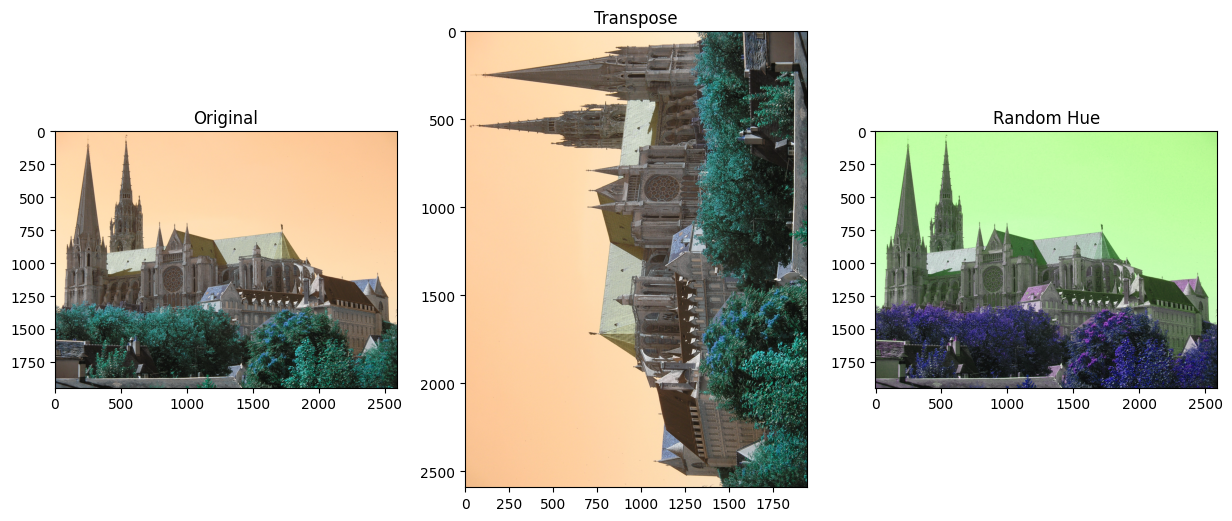

In [ ]:
# plt.imshow(images[0])
# plt.title('Original')

fig, axs = plt.subplots(1, 3, figsize=(15, 8))
axs[0].imshow(images[0])
axs[0].set_title("Original")
axs[1].imshow(tf.image.transpose(images[0]))
axs[1].set_title("Transpose")
axs[2].imshow(tf.image.random_hue(images[0], 0.3))
axs[2].set_title("Random Hue")
plt.show()
# plt.savefig('my_plot.png')

In [ ]:
# # Generate augmented images
# aug_images = []
# for image in X_train:
#     # Expand the dimensions of the image to match the expected input shape of the datagen
#     # image = np.expand_dims(image, axis=0)
#     # aug_iter = datagen.flow(image, batch_size=32)
#     # aug_image = aug_iter.next()[0]
#     # aug_images.append(aug_image)
#     aug_1 = tf.image.random_flip_up_down(image)
#     aug_2 = tf.image.random_flip_left_right(image)
#     aug_3 = tf.image.random_brightness(image, 0.2)
#     # aug_3 = 

# tf.image.random_flip_up_down(X_train)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define the augmentation parameters for training data
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255.,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     # brightness_range=[0.1, 1.5],
#     horizontal_flip=True,
#     fill_mode='nearest',
#     # validation_split=0.2,
#     preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

# train_datagen.fit(X_train)

# Define the augmentation and preprocess parameters for training data
datagen = ImageDataGenerator(
    #rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    # rescale=1.0/255.,
    # already includes normalization and scaling
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

# Define the preprocess parameters for training data
preprocess_eff = ImageDataGenerator(
    #rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # fill_mode='nearest',
    # rescale=1.0/255.,
    # already includes normalization and scaling
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

preprocess_vgg = ImageDataGenerator(
    #rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # fill_mode='nearest',
    # rescale=1.0/255.,
    # already includes normalization and scaling
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)



In [ ]:
# aug_images = []
# aug_targets = []
# for image, target in zip(X_train, y_train):
#     # expand the dimensions of the image to match the expected input shape of the datagen
#     image = np.expand_dims(image, axis=0)
#     target = np.expand_dims(target, axis=0)
    
#     # generate 2 new image sets using the datagen
#     for i in range(2):
#         aug_iter = datagen.flow(image, target)
#         aug_image, aug_target = aug_iter.next()
#         aug_images.append(aug_image[0])
#         aug_targets.append(aug_target[0])

In [ ]:
# imag= datagen.flow(X_train, y_train)
# tu, biao = next(imag)

# fig, axes = plt.subplots(2, 4, figsize=(12, 6))
# axes = axes.ravel()
# for i in range(8):
#     axes[i].imshow(tu[i])
#     axes[i].set_title('Label: ' + str(biao[i]))
# plt.tight_layout()
# plt.show()

# # plot the first few images in the batch
# fig, axes = plt.subplots(2, 4, figsize=(12, 6))
# axes = axes.ravel()
# for i in range(8):
#     axes[i].imshow(images[i])
#     axes[i].set_title('Label: ' + str(labels[i]))
# plt.tight_layout()
# plt.show()

In [ ]:
# # X_train = np.array(aug_images)
# # y_train = np.array(aug_targets)
# # preprocess validation set
# X_valid_pre = datagen.flow(X_valid, y_valid, batch_size=1)
# # preprocess test set
# X_test_pre = datagen.flow(X_test, y_test, batch_size=1)
# print(len(X_train_aug), len(X_valid_pre), len(X_test_pre))

In [ ]:
# # create a list of augmented images
# aug_images = []
# for image in X_train:
#     # expand the dimensions of the image to match the expected input shape of the datagen
#     image = np.expand_dims(image, axis=0)
    
#     # generate 2 new image sets using the datagen
#     for i in range(2):
#         aug_iter = datagen.flow(image)
#         aug_image = aug_iter.next()[0]
#         aug_images.append(aug_image)


In [ ]:
# # Concatenate the original and augmented images
# aug_images = np.array(aug_images)
# all_images = np.concatenate([all_img, aug_images], axis=0)

# # create a list of targets for the augmented images
# aug_targets = []
# for target in targets:
#     aug_targets.extend([target] * 3)

# # concatenate the original and augmented targets
# labels = np.array(aug_targets)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, stratify=labels, random_state=32)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)
# print(len(X_train), len(X_valid), len(X_test))

In [18]:
# Preprocess and augment the images and targets using the data generator
num_batch = 8
X_train_pre = preprocess_eff.flow(X_train_aug, y_train_aug, batch_size=num_batch)
X_valid_pre = preprocess_eff.flow(X_valid, y_valid, batch_size=num_batch)
X_test_pre = preprocess_eff.flow(X_test, y_test, batch_size=1)
print(len(X_train_pre), len(X_valid_pre), len(X_test_pre))

196 10 98


In [ ]:
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
#     tf.keras.layers.RandomRotation(factor=0.05, seed=42),
#     tf.keras.layers.RandomContrast(factor=0.2, seed=42),
#     layers.experimental.preprocessing.RandomZoom(0.1, see=42),
# ])


# Building the classification models
## i. Combining category and landmark names


1. Transfer learning with EfficientNetB0

In [19]:
# eff_pre = tf.keras.Sequential([
# #   layers.experimental.preprocessing.Resizing(224,224),
# #   layers.experimental.preprocessing.Rescaling(1./255),
# #   layers.experimental.preprocessing.RandomFlip("horizontal"),
# #   layers.experimental.preprocessing.RandomRotation(0.1),
#   tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
# #   layers.experimental.preprocessing.RandomContrast(0.1),
#   tf.keras.layers.RandomRotation(factor=0.05, seed=42),
#   tf.keras.layers.Lambda(tf.keras.applications.efficientnet.preprocess_input)
# ])

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True)

In [20]:
# Load the pre-trained EfficientNetB0 model
eff_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

eff_x = tf.keras.layers.GlobalAveragePooling2D()(eff_model.output)
# eff_x = tf.keras.layers.BatchNormalization()(eff_x),
eff_x = tf.keras.layers.Dropout(0.5)(eff_x)
# eff_x = tf.keras.layers.Flatten()(eff_x)
# eff_x = tf.keras.layers.Dense(units=1024, activation='relu')(eff_x)
# eff_x = tf.keras.layers.Dropout(0.5)(eff_x)
eff_x = tf.keras.layers.Dense(units=512, activation='relu')(eff_x)
eff_x = tf.keras.layers.Dropout(0.5)(eff_x)
eff_x = tf.keras.layers.Dense(units=256, activation='relu')(eff_x)
eff_x = tf.keras.layers.Dropout(0.4)(eff_x)
# eff_x = tf.keras.layers.Dense(units=64, activation='relu')(eff_x)
# eff_x = tf.keras.layers.Dropout(0.4)(eff_x)
eff_output = tf.keras.layers.Dense(units=num_land, activation="softmax")(eff_x)

model_eff = tf.keras.Model(inputs=eff_model.input, outputs=eff_output)

# for layer in eff_model.layers[70:]:
# # for layer in eff_model.layers:
#     layer.trainable = True

# for layer in vgg16_model.layers[:-10]:
for layer in eff_model.layers:
    layer.trainable = False

# Unfreeze the top 2 convolutional blocks 
for layer in eff_model.layers[20:]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_eff.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model_eff.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

In [21]:
eff_history = model_eff.fit(X_train_pre, validation_data=X_valid_pre, epochs=30, callbacks=[early_stopping])

Epoch 1/30
196/196 [==============================] - 36s 82ms/step - loss: 2.1700 - accuracy: 0.2696 - val_loss: 1.2360 - val_accuracy: 0.6962
Epoch 2/30
196/196 [==============================] - 13s 66ms/step - loss: 1.1746 - accuracy: 0.5744 - val_loss: 0.4504 - val_accuracy: 0.9114
Epoch 3/30
196/196 [==============================] - 13s 68ms/step - loss: 0.6541 - accuracy: 0.7827 - val_loss: 0.2785 - val_accuracy: 0.9367
Epoch 4/30
196/196 [==============================] - 13s 65ms/step - loss: 0.4030 - accuracy: 0.8696 - val_loss: 0.1927 - val_accuracy: 0.9367
Epoch 5/30
196/196 [==============================] - 14s 69ms/step - loss: 0.2989 - accuracy: 0.9016 - val_loss: 0.1597 - val_accuracy: 0.9494
Epoch 6/30
196/196 [==============================] - 14s 72ms/step - loss: 0.2016 - accuracy: 0.9393 - val_loss: 0.1488 - val_accuracy: 0.9620
Epoch 7/30
196/196 [==============================] - 13s 69ms/step - loss: 0.1742 - accuracy: 0.9431 - val_loss: 0.1384 - val_accuracy:

In [22]:
print(tf.__version__)

2.8.0


### Model evalutation

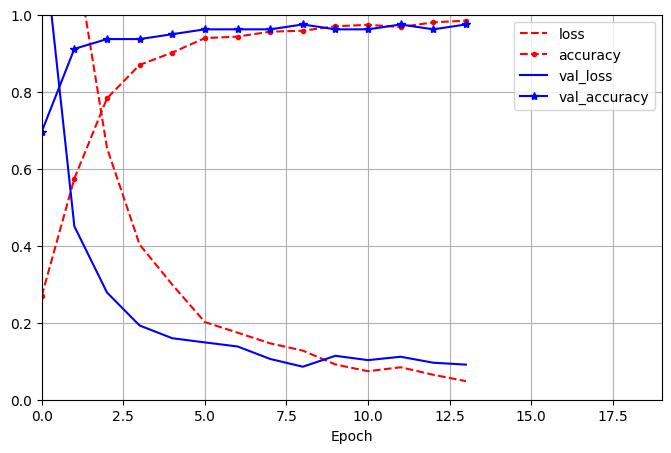

In [22]:
pd.DataFrame(eff_history.history).plot(
    figsize=(8, 5), xlim=[0, 19], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

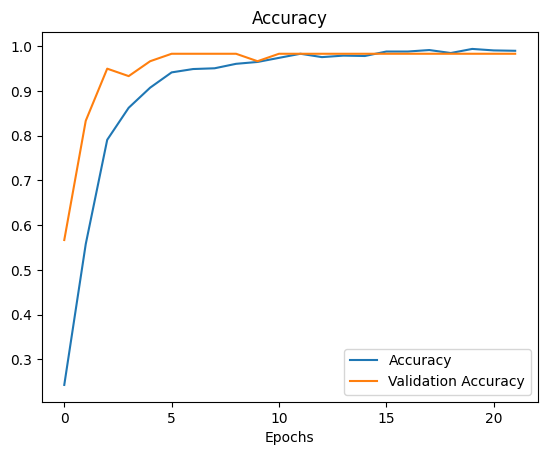

In [ ]:
plt.plot(eff_history.history["accuracy"], label="Accuracy")
plt.plot(eff_history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.title("Accuracy")
plt.legend()

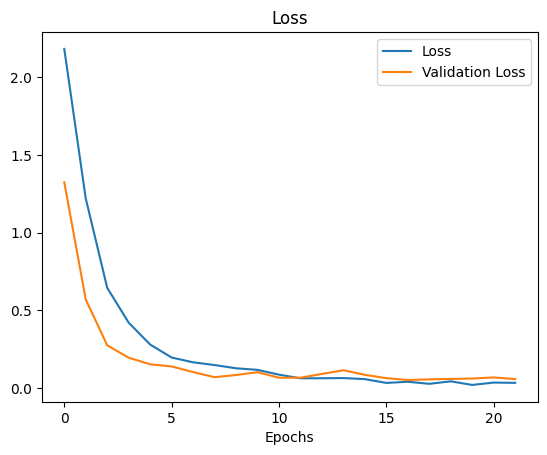

In [ ]:
plt.plot(eff_history.history["loss"], label="Loss")
plt.plot(eff_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.title("Loss")
plt.legend()

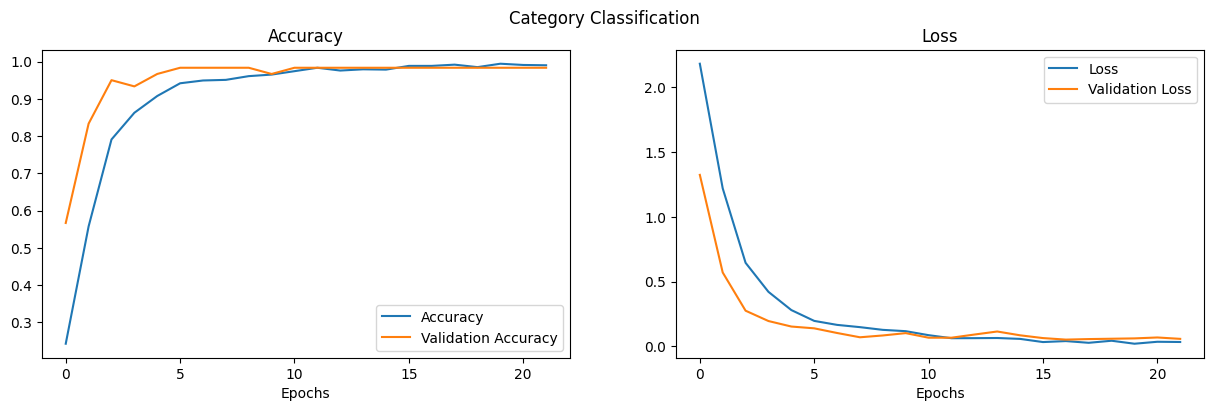

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))

ax1.plot(eff_history.history["accuracy"], label="Accuracy")
ax1.plot(eff_history.history["val_accuracy"], label="Validation Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_title("Accuracy")
ax1.legend()

ax2.plot(eff_history.history["loss"], label="Loss")
ax2.plot(eff_history.history["val_loss"], label="Validation Loss")
ax2.set_xlabel("Epochs")
ax2.set_title("Loss")
ax2.legend()

fig.suptitle("Category Classification")

plt.show()

In [23]:
model_eff.evaluate(X_test_pre, verbose = 1)

98/98 [==============================] - 2s 16ms/step - loss: 0.2304 - accuracy: 0.9388


[0.23037351667881012, 0.9387755393981934]

In [24]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# report accuracy on the test set
y_proba = model_eff.predict(X_test)
y_pred = y_proba.argmax(axis=-1)

accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_test, y_pred)
print('Accuracy on the test set is', accuracy.result().numpy())

# report precision on the test set
precision = precision_score(y_test, y_pred, average='macro')
print('Precision on the test set is', precision)

# report recall on the test set
recall = recall_score(y_test, y_pred, average='macro')
print('Recall on the test set is', recall)

# report f1-score on the test set
recall = f1_score(y_test, y_pred, average='macro')
print('F1-score on the test set is', recall)

# report the precision and recall values by class_id on the test set
print('The precision and recall values by class_id on the test set:')
print(classification_report(y_test, y_pred))

Accuracy on the test set is 0.93877554
Precision on the test set is 0.9393762183235869
Recall on the test set is 0.9388888888888888
F1-score on the test set is 0.934633372868667
The precision and recall values by class_id on the test set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.80      1.00      0.89        12
           2       0.94      0.94      0.94        18
           3       1.00      0.80      0.89        15
           4       1.00      0.89      0.94        18
           5       0.94      1.00      0.97        17

    accuracy                           0.94        98
   macro avg       0.94      0.94      0.93        98
weighted avg       0.95      0.94      0.94        98



In [28]:
print(y_pred)
np.array(categories)[y_pred]

[0 0 0 3 2 3 4 4 4 4 1 3 1 4 4 2 5 0 0 1 2 1 1 4 3 5 0 0 2 2 2 2 3 5 5 1 2
 3 0 4 5 0 4 5 3 5 1 2 1 4 0 4 3 0 2 5 0 5 5 1 0 5 3 5 5 2 1 2 4 2 0 0 4 5
 3 4 5 0 1 2 5 1 2 1 3 0 0 2 3 5 1 0 2 2 1 4 5 4]


array(['Gothic', 'Gothic', 'Gothic', 'Neoclassical', 'Mughal',
       'Neoclassical', 'Pagodas', 'Pagodas', 'Pagodas', 'Pagodas',
       'Modern', 'Neoclassical', 'Modern', 'Pagodas', 'Pagodas', 'Mughal',
       'Pyramids', 'Gothic', 'Gothic', 'Modern', 'Mughal', 'Modern',
       'Modern', 'Pagodas', 'Neoclassical', 'Pyramids', 'Gothic',
       'Gothic', 'Mughal', 'Mughal', 'Mughal', 'Mughal', 'Neoclassical',
       'Pyramids', 'Pyramids', 'Modern', 'Mughal', 'Neoclassical',
       'Gothic', 'Pagodas', 'Pyramids', 'Gothic', 'Pagodas', 'Pyramids',
       'Neoclassical', 'Pyramids', 'Modern', 'Mughal', 'Modern',
       'Pagodas', 'Gothic', 'Pagodas', 'Neoclassical', 'Gothic', 'Mughal',
       'Pyramids', 'Gothic', 'Pyramids', 'Pyramids', 'Modern', 'Gothic',
       'Pyramids', 'Neoclassical', 'Pyramids', 'Pyramids', 'Mughal',
       'Modern', 'Mughal', 'Pagodas', 'Mughal', 'Gothic', 'Gothic',
       'Pagodas', 'Pyramids', 'Neoclassical', 'Pagodas', 'Pyramids',
       'Gothic', 'Modern', '

2. Transfer learning with VGG16

In [ ]:
# Preprocess and augment the images and targets using the data generator
num_batch = 8
X_train_pre = preprocess_vgg.flow(X_train_aug, y_train_aug, batch_size=num_batch)
X_valid_pre = preprocess_vgg.flow(X_valid, y_valid, batch_size=num_batch)
X_test_pre = preprocess_vgg.flow(X_test, y_test, batch_size=num_batch)
print(len(X_train_pre), len(X_valid_pre), len(X_test_pre))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.001, restore_best_weights=True)

In [ ]:
# Load the pre-trained EfficientNetB0 model
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# for layer in vgg16_model.layers:
#     print(layer)


In [ ]:
vgg_x = tf.keras.layers.GlobalAveragePooling2D()(vgg16_model.output)
vgg_x = tf.keras.layers.Dropout(0.45)(vgg_x)
vgg_x = tf.keras.layers.Flatten()(vgg_x)
vgg_x = tf.keras.layers.Dense(units=1024, activation='relu')(vgg_x)
vgg_x = tf.keras.layers.Dropout(0.45)(vgg_x)
# vgg_x = tf.keras.layers.Dense(units=512, activation='relu')(vgg_x)
# vgg_x = tf.keras.layers.Dropout(0.45)(vgg_x)
# vgg_x = tf.keras.layers.Dense(units=512, activation='relu')(vgg_x)
# vgg_x = tf.keras.layers.Dropout(0.45)(vgg_x)
# vgg_x = tf.keras.layers.Dense(256,activation='relu')(vgg_x)
# vgg_x = tf.keras.layers.Dropout(0.5)(vgg_x)
# vgg_x = tf.keras.layers.Dense(128,activation='relu')(vgg_x)
# vgg_x =tf.keras.layers.Dropout(0.5)(vgg_x)
# vgg_x =tf.keras.layers.Dense(64,activation='relu')(vgg_x)
# vgg_x =tf.keras.layers.Dropout(0.5)(vgg_x)
# vgg_x =tf.keras.layers.Dense(32,activation='relu')(vgg_x)
# vgg_x =tf.keras.layers.Dropout(0.5)(vgg_x)
vgg_output = tf.keras.layers.Dense(units=num_land, activation="softmax")(vgg_x)

model_vgg = tf.keras.Model(inputs=vgg16_model.input, outputs=vgg_output)

# for layer in vgg16_model.layers[:-10]:
# for layer in vgg16_model.layers:
#     layer.trainable = True

# Unfreeze the top 2 convolutional blocks 
# for layer in vgg16_model.layers[4:]:
#     layer.trainable = True
for layer in vgg16_model.layers:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_vgg.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model_vgg.summary()

In [ ]:
vgg_history = model_vgg.fit(X_train_pre, validation_data=X_valid_pre, epochs=30, callbacks=[early_stopping])

### Model evaluation

In [ ]:
pd.DataFrame(vgg_history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [ ]:
model_vgg.evaluate(X_test, y_test, verbose = 1)

3. Comnbining two pre-trained models

In [ ]:
# Load the pre-trained EfficientNetB0 model
eff_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# eff_x = tf.keras.layers.GlobalAveragePooling2D()(eff_model.output)
# # eff_x = tf.keras.layers.BatchNormalization()(eff_x),
# eff_x = tf.keras.layers.Dropout(0.5)(eff_x)
# # eff_x = tf.keras.layers.Flatten()(eff_x)
# eff_x = tf.keras.layers.Dense(units=256, activation='relu')(eff_x)
# eff_x = tf.keras.layers.Dropout(0.45)(eff_x)
# eff_x = tf.keras.layers.Dense(units=128, activation='relu')(eff_x)
# eff_x = tf.keras.layers.Dropout(0.4)(eff_x)
# eff_output = tf.keras.layers.Dense(units=num_land, activation="softmax")(eff_x)

# model_eff = tf.keras.Model(inputs=eff_model.input, outputs=eff_output)

# for layer in eff_model.layers[70:]:
# # for layer in eff_model.layers:
#     layer.trainable = True

# optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
# # optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# model_eff.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
#               metrics=["accuracy"])
# model_eff.summary()

vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

combine = tf.keras.layers.Concatenate()([vgg16_model.output, eff_model.output])
# out = eff_model(vgg16_model.output)
# model_com = tf.keras.Model(inputs=eff_model.input, outputs=eff_model.output)
# for layer in vgg16_model.layers:
#     model_com.add(layer)

com = tf.keras.Model(combine.input, combine.output)

com.summary()


In [ ]:
merged = tf.keras.layers.GlobalAveragePooling2D()(combine)
# merged = tf.keras.layers.Dropout(0.5)(merged)
# merged = tf.keras.layers.Flatten()(merged)

# merged = tf.keras.layers.Dense(units=512, activation='relu')(merged)
# merged = tf.keras.layers.Dropout(0.5)(merged)
# merged = tf.keras.layers.Dense(units=512, activation='relu')(merged)
# merged = tf.keras.layers.Dropout(0.45)(merged)
# merged = tf.keras.layers.Dense(256, activation='relu')(merged)
# merged = tf.keras.layers.Dropout(0.3)(vgg_x)
# merged = tf.keras.layers.Dense(128, activation='relu')(merged)
# merged = tf.keras.layers.Dropout(0.3)(vgg_x)
# merged = tf.keras.layers.Dense(64, activation='relu')(merged)

out = tf.keras.layers.Dense(units=num_land, activation='softmax')(merged)

for layer in vgg16_model.layers:
    layer.trainable = False

for layer in eff_model.layers:
    layer.trainable = False

# create the final model
model_com = tf.keras.Model(inputs=vgg16_model.input, outputs=out)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_com.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model_com.summary()

# ii. Separating two kinds of labels
1. EfficientNetB0

2. VGG16

In [ ]:
# Generate augmented images
aug_images = []
for image in all_img:
    # Expand the dimensions of the image to match the expected input shape of the datagen
    image = np.expand_dims(image, axis=0)
    aug_iter = datagen.flow(image, batch_size=32)
    aug_image = aug_iter.next()[0]
    aug_images.append(aug_image)

In [ ]:
len(aug_images)

In [ ]:
# Concatenate the original and augmented images
aug_images = np.array(aug_images)
all_images = np.concatenate([all_img, aug_images], axis=0)

# Define the target labels
new_target = np.concatenate([target, target], axis=0)
labels = np.array(new_target)

In [ ]:
all_images.shape

In [ ]:
plt.imshow(aug_images[0])
plt.title('augmented')

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42)

In [ ]:
with tf.device('/GPU:0'):
    # Load the pre-trained EfficientNetB0 model
    base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False)

    avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = tf.keras.layers.Dense(len(landmarks), activation="softmax")(avg)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)

    for layer in base_model.layers:
        layer.trainable = False

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))